In [ ]:
import pandas as pd
import os
os.chdir("/data/biocomp/bahin/biocomp-mb-scripts/Scripts/Prestations/")
import DemultiplexInfluenza_A2018
from DemultiplexInfluenza_A2018 import *

In [ ]:
### Common variables
samples = ["i02", "i03", "i04", "i05", "i06", "i07", "i08"]

In [ ]:
### Reads per BC plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Loading the data (first i02 and a loop for the others)
final = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/i02/i02.droplet_total_reads.tsv", sep="\t", index_col=0, usecols=["Barcode", "Total_unique_reads"])
final.rename(columns={"Total_unique_reads": "i02"}, inplace=True)
for sample in samples[1:]:
    df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/" + sample + "/" + sample + ".droplet_total_reads.tsv", sep="\t", usecols=["Barcode", "Total_unique_reads"])
    df.rename(columns={"Total_unique_reads": sample}, inplace=True)
    final = final.merge(df, on="Barcode", how="outer")

display(final.head(2))

fig = plt.figure(figsize=(50, 30))
for sample, nb_plot in zip(samples, range(1, 8)):
    ax = plt.subplot(2, 4, nb_plot)
    #ax.set_xlim(0, 150)
    if sample in ["i02", "i03", "i04", "i05"]:
        #ax.set_ylim(0, 8000)
        bins = 1000
    else:
        #ax.set_ylim(0, 250)
        bins = 100
    ax = sns.distplot(final[sample].dropna(), bins=bins, kde=False)
    plt.xscale("log")
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=25)
    ax.set_xlabel(sample, fontsize=30)
    
#plt.yscale("log")

In [ ]:
### Strains distribution among samples
import pandas as pd
%matplotlib inline

df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/all_mapping_stats.tsv", sep="\t")
display(df.head(2))
#df.groupby(["Strain"]).sum().T.plot(kind="bar", stacked=True, colormap="Set2", legend="reverse").legend(bbox_to_anchor=(1.5, 1))
#all_samples_mapping = df.groupby(["Strain"]).sum().apply(lambda x: 100 * x / x.sum()).T.plot(kind="bar", stacked=True, colormap="Set2", legend="reverse").legend(bbox_to_anchor=(1.5, 1))  ## Normalized
all_samples_mapping = df.groupby(["Strain"]).sum().apply(lambda x: 100 * x / x.sum()).T.plot(kind="bar", stacked=True, colormap="Set2", legend="reverse")  ## Normalized

#fig = all_samples_mapping[0].get_figure()
#fig.savefig("/data/biocomp/bahin/biocomp-mb-scripts/strains_barplot.pdf")
plt.savefig("/data/biocomp/bahin/biocomp-mb-scripts/strains_barplot.pdf")

,Unnamed: 0,nb_reads
0,0,5
1,1,1
2,2,1
3,3,1
4,4,5


X [ 5  1 15 25]
Y [7 9 3 1]
W [35  9 45 25]


Text(0, 0.5, 'count x #reads/BC')

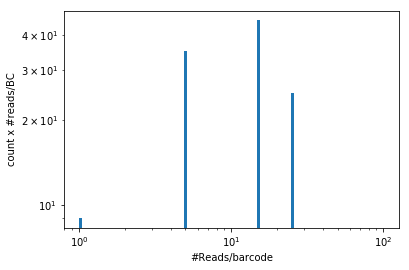

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
%matplotlib inline

dir = "/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Weighting/"

df = pd.read_csv(dir + "test.csv")
display(df.head())

k2 = df.drop(df.columns[[0]], axis=1)
k2.to_csv(dir + "test_reads_per_BC.csv", header=False)
i=0
with open(dir + "test_reads_per_BC.csv") as f: #the csv contains all the bc and the nb of reads per bc associated
    #count_freq = defaultdict(int)
    count_freq = {}

    for line in f:
        count = line.rstrip('\n').split(',') # here the frequency of each line is calculated
        #count_freq[count[1]] += 1
        if count[1] not in count_freq:
            count_freq[count[1]] = 0
        count_freq[str(count[1])] += 1
        i+=1

    #x = np.array(count_freq.keys())  
    #x = np.array(x)
    #x = x.astype(int)
    x = np.array([int(k) for k in count_freq.keys()])
    print("X", x)
    #y = np.array(count_freq.values())
    y = np.array([v for v in count_freq.values()])
    print("Y", y)
    w = x * y # now you consider the nb of reads per bc x the frequency of the event
    print("W", w)

plt.hist(x, np.logspace(0,2,100), weights=w)
#x = np.array([10, 20, 30, 40, 50, 60, 70, 80])
#print(np.logspace(0,2,100))
#plt.hist(x, np.logspace(0,2,100))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('#Reads/barcode')
plt.ylabel('count x #reads/BC')

,nb_reads,BC_ID,weights
0,1,9,9
1,5,7,35
2,15,3,45
3,25,1,25


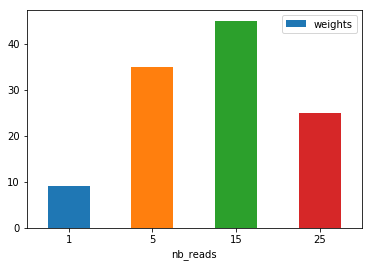

In [104]:
## Version with pandas plot function
import pandas as pd
import seaborn as sns

dir = "/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/"

df = pd.read_csv(dir + "Weighting/test.csv", names=["BC_ID", "nb_reads"], header=0)
gb = df.groupby("nb_reads").count()
gb.reset_index(inplace=True)
gb["weights"] = gb["BC_ID"] * gb["nb_reads"]
#sns.distplot(gb["BC_ID"], bins=4, weights=gb.index)
ax = gb.plot.bar(x="nb_reads", y="weights", rot=0)

#plt.hist(gb["nb_reads"], np.logspace(0,2,100) , weights=gb["weights"])
#plt.xscale("log")
#plt.yscale("log")
#plt.xlabel('#Reads/barcode')
#plt.ylabel('count x #reads/BC')

In [50]:
## Version pandas parsing and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting the directory
dir = "/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/"

def draw_reads_per_BC_barplot(file):
    # Importing the file
    df = pd.read_csv(file, sep="\t", header=0, usecols=["Barcode", "Total_unique_reads"])
    #display(df.head())

    # Counting the occurences of reads / BC
    gb = df.groupby("Total_unique_reads").count()

    # Weighting by the number of reads / BC
    gb.reset_index(inplace=True)
    gb["weights"] = gb["Barcode"] * gb["Total_unique_reads"]
    #display(gb.head())
    #ax = gb.plot.bar(x="Total_unique_reads", y="weights", rot=0)

    # Plotting
    plt.hist(gb["Total_unique_reads"], np.logspace(0,4,100) , weights=gb["weights"])
    plt.xscale("log")
    #plt.yscale("log")
    plt.xlabel("#Reads/barcode")
    plt.ylabel("count x #reads/BC")

#draw_reads_per_BC_barplot(dir + "Runs/181123_C6CK5/Test/i06/i06.before_filter.droplet_total_reads.tsv")

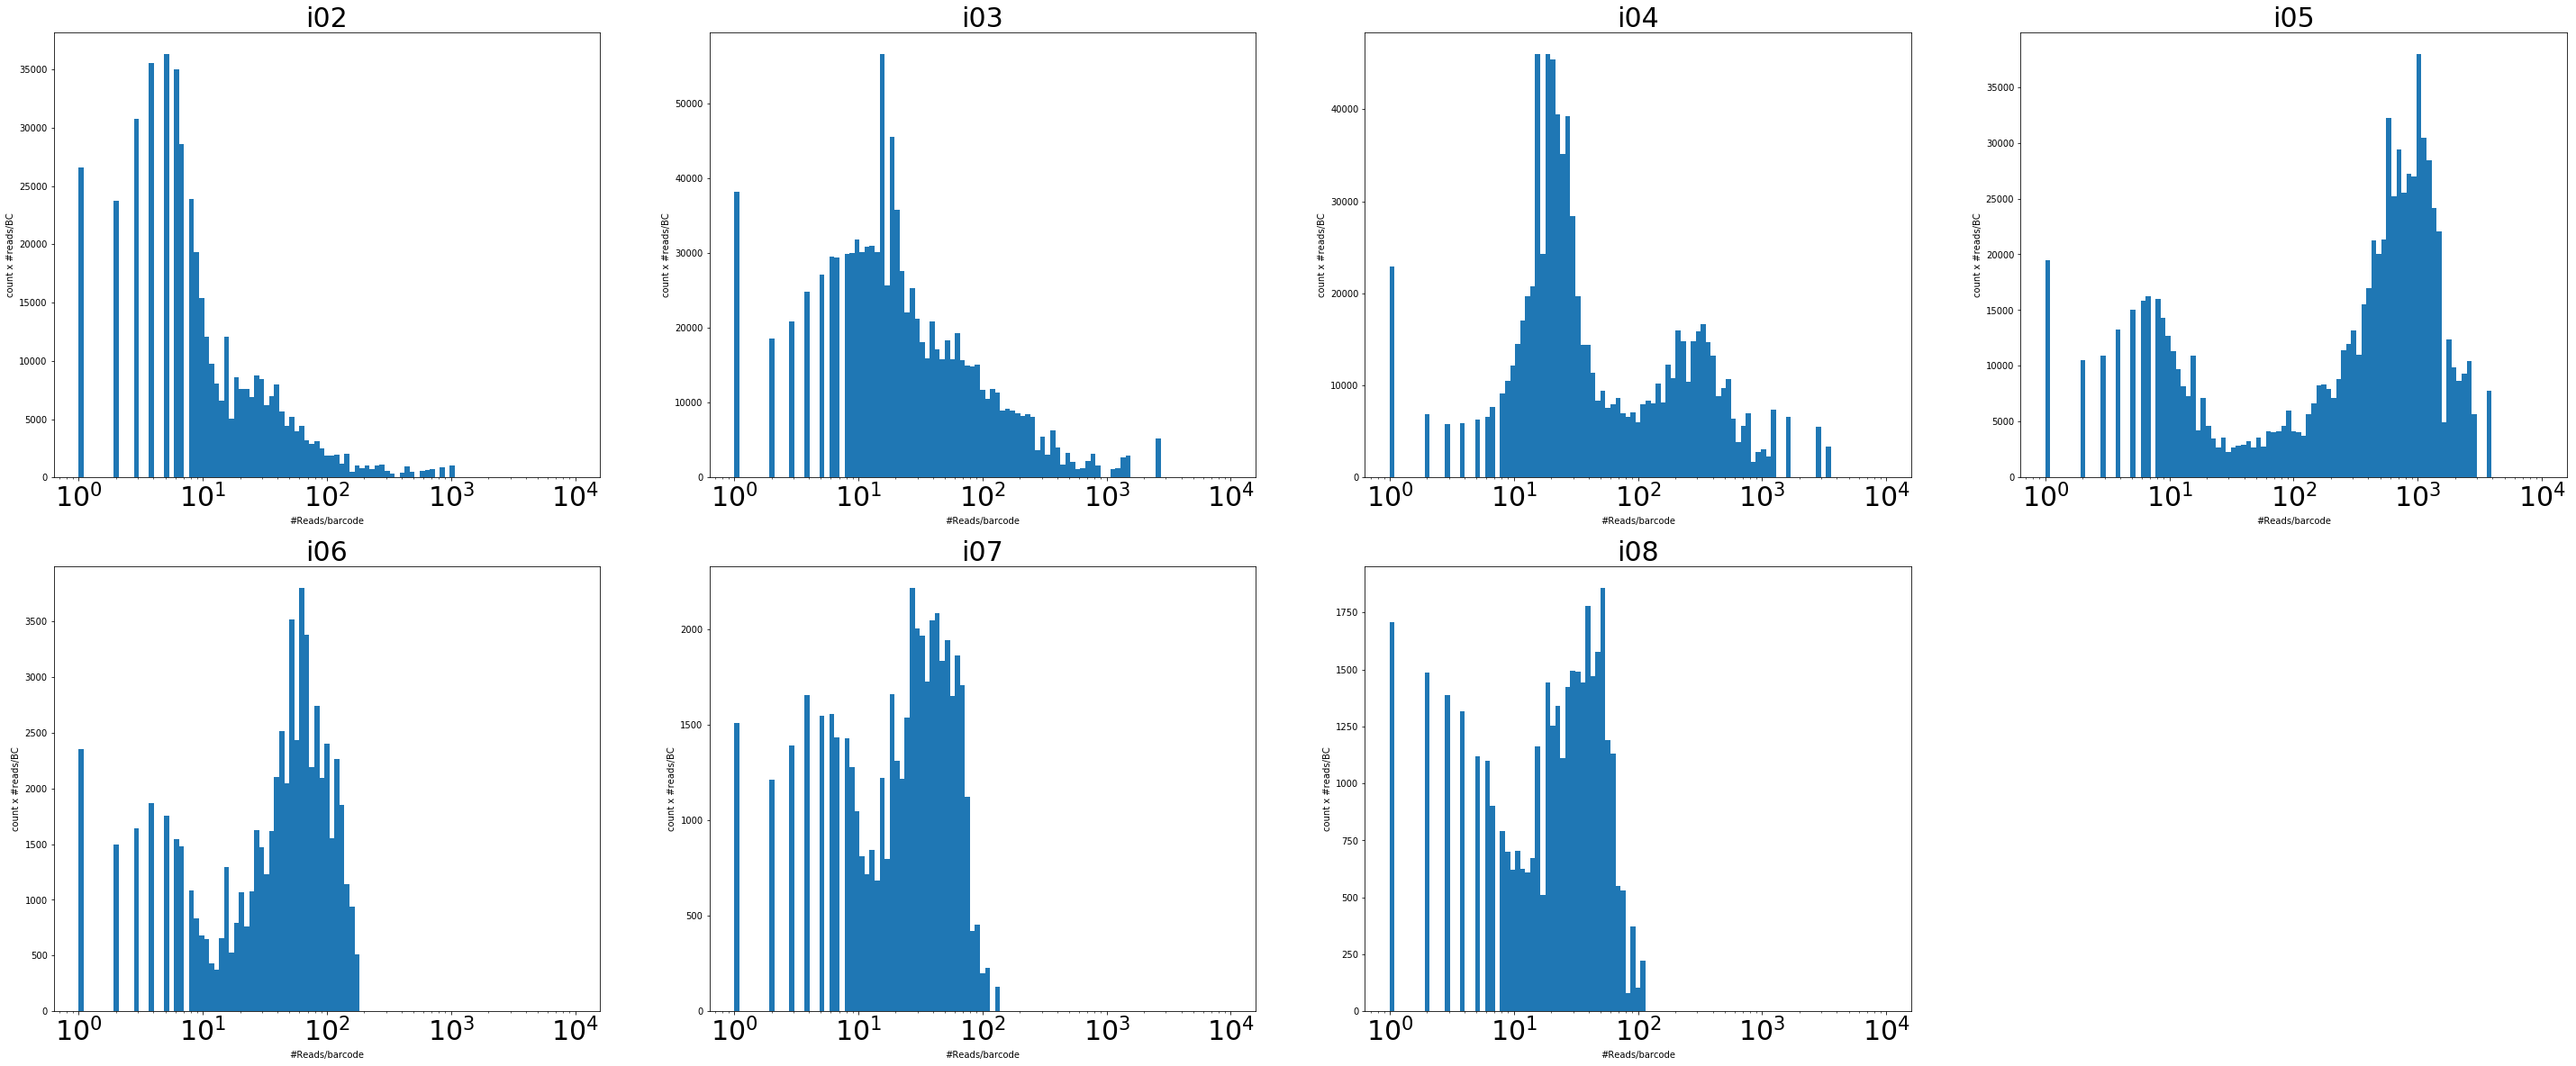

In [48]:
# Displaying the curves
fig = plt.figure(figsize=(50, 20))
for sample, nb_plot in zip(range(2,9), range(1, 16)):
    ax = plt.subplot(2, 4, nb_plot)
    filepath = dir + "Runs/181123_C6CK5/Test/i0" + str(sample) + "/i0" + str(sample) + ".before_filter.droplet_total_reads.tsv"
    plt.title("i0" + str(sample), fontdict={"fontsize": 30})
    plt.xticks(fontsize=30)
    draw_reads_per_BC_barplot(filepath)

,30
0,30
1,30
2,30
3,30
4,30


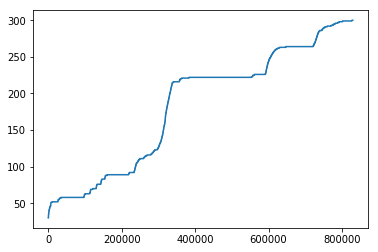

In [54]:
file = "/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/Test/30/tmp"

df = pd.read_csv(file)
display(df.head())
plt.plot(df)

In [118]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/Test/30/Test_avec_GSP/i02/i02.tsv", sep="\t")
display(df[["UMI", "Strain_R1"]].head(2))

#df2 = df.groupby(["Barcode", "Strain"]).UMI.count()
#df3 = df2.reset_index()
#display(df3.head())
#df4 = df3.pivot(index="Barcode", columns="Strain", values="UMI")
#display(df4.head())

#ax = sns.scatterplot(x="H1N1", y="H3N2", data=df4)

,UMI,Strain_R1
0,ACTGGACTA,MappingAmbiguous
1,AGGGGGAGG,H1N1


,Barcode,UMI,Strain,RNA_fragment,Total_reads_count,Total_reads_count_BC_filter
0,A1-B1-C1-D1,CGTTCAGTA,H1N1,NS-1,3,3.0
1,A1-B1-C1-D1,CGTTCAGTA,H3N2,NA-1,3,3.0


Strain        H1N1                                               H3N2  \
RNA_fragment  HA-1 M-1 NA-1 NP-2 NS-1 PA-2 PB1-1 PB2-3 Undefined HA-1   
Barcode                                                                 
A1-B1-C1-D1      0   0    3    0    3    0     0     0         0    0   
A1-B1-C84-D1     0   0   20    0   53    0     3     0         0   15   
A1-B11-C21-D1    0   0    0    0    7    0     2     0         0    1   
A1-B14-C26-D1    0   0    0    0    0    0     0     0         0    0   
A1-B17-C38-D1    0   0    0    0    5    0     0     0         0    0   

Strain           ...                                    MappingAmbiguous  \
RNA_fragment     ...    NS-1 PA-2 PB1-1 PB2-3 Undefined MappingAmbiguous   
Barcode          ...                                                       
A1-B1-C1-D1      ...       0    0     0    15         0                0   
A1-B1-C84-D1     ...      43    0    15    27         0                0   
A1-B11-C21-D1    ...       3    0     1     1         0                0   
A1-B14-C26-D1    ...       1    0     0     0         0                0   
A1-B17-C38-D1    ...       3    0     0     0         0                0   

Strain        Undefined                        
RNA_fragment       NS-1 PB1-1 PB2-3 Undefined  
Barcode                                        
A1-B1-C1-D1           0     0     0         0  
A1-B1-C84-D1          0     0     0         0  
A1-B11-C21-D1         0     0     0         0  
A1-B14-C26-D1         0     0     0         0  
A1-B17-C38-D1         0     0     0         0  

[5 rows x 23 columns]

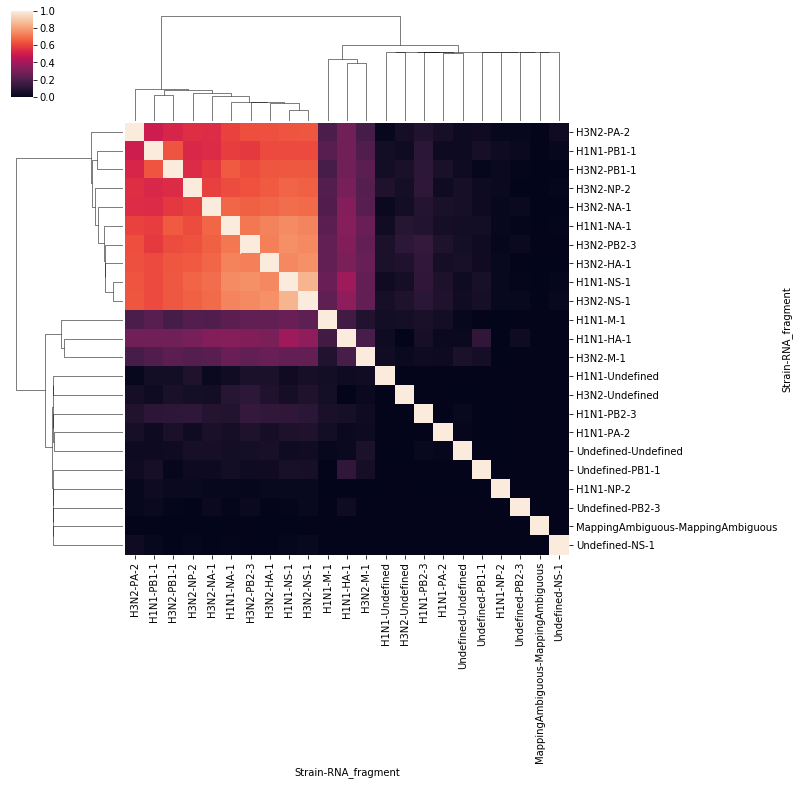

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/Test/30/Test_avec_GSP/i06/i06.droplet_stats.tsv", sep="\t")
display(df.head(2))

df = df.pivot_table(index="Barcode", columns=["Strain", "RNA_fragment"], values="Total_reads_count", aggfunc=np.sum, fill_value=0)
display(df.head())
g = sns.clustermap(df.corr())

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loading the data
sample = "i02"
df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/" + sample + "/" + sample + ".droplet_stats.tsv", sep="\t")
display(df.head(2))
print(df.shape)

,Barcode,UMI,Strain,RNA_fragment,Total_reads_count,Total_reads_count_BC_filter
0,A1-B1-C1-D1,ACTGGACTA,Undefined,Undefined,1,1.0
1,A1-B1-C1-D1,AGGGGGAGG,H1N1,PB1-1,1,1.0


(454946, 6)


In [129]:
# Filtering the 
dfbis = df.loc[df.RNA_fragment == "HA-1"]
print(dfbis.shape)

# Filtering out the barcodes that have UMIs associated to more than one strain
df2 = dfbis.groupby(["Barcode", "UMI"]).filter(lambda x: x["Strain"].nunique() <= 1)
display(df2.head(10))
print(df2.shape)

(18529, 6)


,Barcode,UMI,Strain,RNA_fragment,Total_reads_count,Total_reads_count_BC_filter
4,A1-B1-C1-D1,CGTTCAGTA,H3N2,HA-1,3,3.0
61,A1-B2-C41-D2,GCGACACTC,H3N2,HA-1,1,NaN
63,A1-B2-C41-D2,TGATAGGAC,H3N2,HA-1,1,NaN
72,A1-B2-C72-D2,TGGAGCGTC,H3N2,HA-1,1,NaN
84,A1-B2-C90-D2,CTGGGATGA,H3N2,HA-1,1,NaN
97,A1-B3-C3-D2,GGAGTACAC,H3N2,HA-1,1,NaN
158,A1-B3-C64-D1,CTGGGATCG,H1N1,HA-1,1,NaN
214,A1-B5-C95-D2,GTACACGTT,H3N2,HA-1,1,NaN
216,A1-B5-C95-D2,TGTTTAATC,H3N2,HA-1,1,NaN
231,A1-B6-C56-D2,GCAGCCAGC,H3N2,HA-1,1,NaN


(18529, 6)


In [130]:
# Filtering out barcode/UMI couples with "Undefined" or "MappingAmbiguous" as strain value
df3 = df2.loc[(df2["Strain"] != "Undefined") & (df2["Strain"] != "MappingAmbiguous") & (df2["RNA_fragment"] != "Undefined") & (df2["RNA_fragment"] != "MappingAmbiguous")]
print(df3.shape)

# Creating a Dataframe with 0 counts for all the barcodes and both strains
fake_exhaustive_strains = pd.MultiIndex.from_product([df3.Barcode.unique(), np.array(["H1N1", "H3N2"])], names=["Barcode", "Strain"]).to_frame(index=False)
fake_exhaustive_strains["Count"] = 0
# Merging the real Dataframe and the fake one to get both strains for every barcode
df4 = pd.merge(df3, fake_exhaustive_strains, on=["Barcode", "Strain"], how="outer")

# Computing the UMI count per barcode
UMI_count = df4.groupby("Barcode").UMI.count()
display(UMI_count.head())

# Counting the UMIs per strain per barcode
df4 = df4.groupby(["Barcode", "Strain"])["UMI"].count()
display(df4.head())
# Computing the percentage of strain per barcode
df4 = df4.groupby("Barcode").apply(lambda x: 100 * x / x.sum())
display(df4.head())
df4 = df4.reset_index()

# Merging the H1N1 percentage and UMI counts dataframes (and renaming the columns)
df4 = pd.merge(df4.loc[df4["Strain"] == "H1N1"], UMI_count.to_frame(), on="Barcode")
df4.rename(index=str, columns={"UMI_x": "H1N1_percentage", "UMI_y": "UMI_count"}, inplace=True)
display(df4.head())

(18529, 6)


Barcode
A1-B1-C1-D1      1
A1-B11-C22-D2    3
A1-B11-C28-D2    1
A1-B11-C92-D2    2
A1-B12-C93-D2    4
Name: UMI, dtype: int64

Barcode        Strain
A1-B1-C1-D1    H1N1      0
               H3N2      1
A1-B11-C22-D2  H1N1      0
               H3N2      3
A1-B11-C28-D2  H1N1      0
Name: UMI, dtype: int64

Barcode        Strain
A1-B1-C1-D1    H1N1        0.0
               H3N2      100.0
A1-B11-C22-D2  H1N1        0.0
               H3N2      100.0
A1-B11-C28-D2  H1N1        0.0
Name: UMI, dtype: float64

,Barcode,Strain,H1N1_percentage,UMI_count
0,A1-B1-C1-D1,H1N1,0.0,1
1,A1-B11-C22-D2,H1N1,0.0,3
2,A1-B11-C28-D2,H1N1,0.0,1
3,A1-B11-C92-D2,H1N1,0.0,2
4,A1-B12-C93-D2,H1N1,0.0,4


,Barcode,Strain,H1N1_percentage,UMI_count
0,A1-B1-C1-D1,H1N1,75.0,4
1,A1-B1-C17-D2,H1N1,0.0,2
2,A1-B1-C44-D2,H1N1,0.0,8
3,A1-B1-C45-D2,H1N1,0.0,2
4,A1-B1-C58-D1,H1N1,100.0,1


UMI_count
1     59.302195
2     61.568782
3     55.890888
4     49.261603
5     42.790769
6     37.182116
7     35.614560
8     34.548895
9     35.854342
10    38.805380
Name: H1N1_percentage, dtype: float64

Text(0, 0.5, 'UMIs percentage')

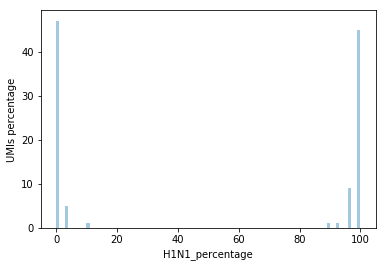

In [613]:
display(df4.head())
display(df4.groupby("UMI_count")["H1N1_percentage"].mean().head(10))

ax = sns.distplot(df4.loc[df4["UMI_count"] == 28]["H1N1_percentage"], bins=100, kde=False)

,Barcode,H1N1_percentage,Strain,UMI_count
0,A0-B0-C0-D0,0.5,H1N1,0
1,A0-B0-C0-D0,11.5,H1N1,0
2,A0-B0-C0-D0,22.5,H1N1,0
3,A0-B0-C0-D0,33.5,H1N1,0
4,A0-B0-C0-D0,44.5,H1N1,0


,Barcode,H1N1_percentage,Strain,UMI_count,Bin
0,A1-B1-C1-D1,0.0,H1N1,1,"(-0.001, 10.0]"
1,A1-B11-C22-D2,0.0,H1N1,3,"(-0.001, 10.0]"
2,A1-B11-C28-D2,0.0,H1N1,1,"(-0.001, 10.0]"
3,A1-B11-C92-D2,0.0,H1N1,2,"(-0.001, 10.0]"
4,A1-B12-C93-D2,0.0,H1N1,4,"(-0.001, 10.0]"


,UMI_count,Barcode
0,1,9678
1,2,1810
2,3,463
3,4,172
4,5,122


,UMI_count,Bin,Count
0,0,"(-0.001, 10.0]",1
1,0,"(10.0, 20.0]",1


Bin,"(-0.001, 10.0]","(10.0, 20.0]","(20.0, 30.0]","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]","(60.0, 70.0]","(70.0, 80.0]","(80.0, 90.0]","(90.0, 100.0]"
UMI_count,,,,,,,,,,
1,85.234553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.765447
2,95.911602,NaN,NaN,NaN,0.718232,NaN,NaN,NaN,NaN,3.370166


,UMI_count,Extreme_bins
24,41,100.0
25,47,100.0
26,57,100.0
27,61,100.0
28,99,100.0


Text(0, 0.5, 'UMI count')

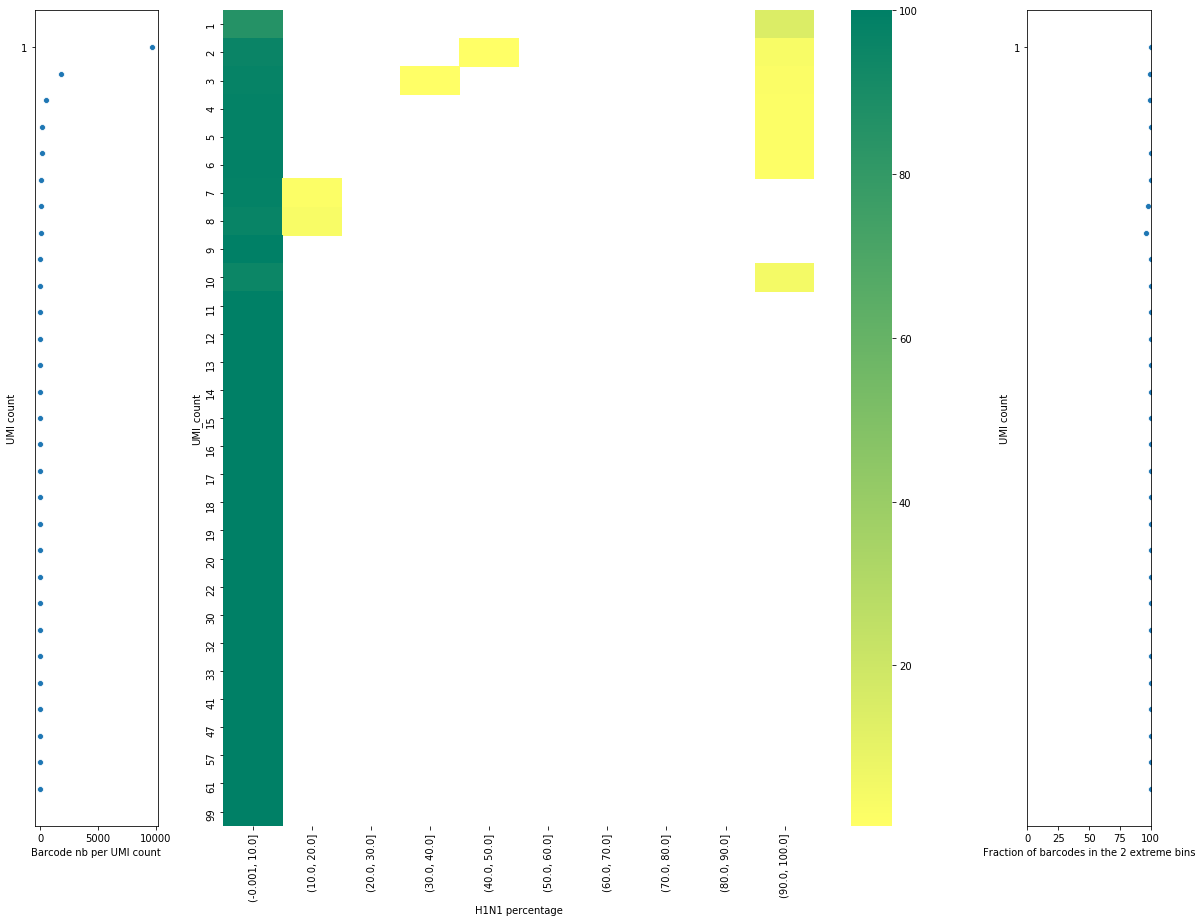

In [131]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Creating the fake df with all percentage bins filled and concatenating it to the real one (to have all of them at least once)
fake_df_all_percentages = pd.DataFrame({"Barcode": ["A0-B0-C0-D0"] * 10, "Strain": ["H1N1"] * 10, "H1N1_percentage": np.linspace(0.5, 99.5, 10), "UMI_count": [0] * 10})
df4 = pd.concat([df4, fake_df_all_percentages], sort=True)
# Sorting H1N1 percentages into 10% bins
display(df4.loc[df4.Barcode == "A0-B0-C0-D0"].head())
df4["Bin"] = pd.cut(df4["H1N1_percentage"], range(0, 101, 10), include_lowest=True)
display(df4.head())
# Creating the general figure
fig = plt.figure(figsize=(20, 15)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 6, 1])
freq = 49  # Setting the y label (UMI count) frequency
# Computing UMI count density for the left scatter plot
UMI_count_density = (df4.loc[df4.UMI_count != 0].groupby("UMI_count").Barcode.count()).to_frame().reset_index()
display(UMI_count_density.head())
# Drawing the left scatter plot
ax0 = plt.subplot(gs[0])
ax0 = sns.scatterplot(x="Barcode", y="index", data=UMI_count_density.reset_index())
ax0.invert_yaxis() # Setting the y axis to be from top to bottom
plt.xlabel("Barcode nb per UMI count")
plt.ylabel("UMI count")
plt.yticks(UMI_count_density.index[::freq], UMI_count_density["UMI_count"][::freq]) # Setting the y ticks to follow the UMI count (with not all values from 0), not the index (all values, starting with 0)
# Creating the central heatmap data
df5 = df4.groupby(["UMI_count", "Bin"]).Bin.count()
df5 = df5.to_frame()
df5.columns = ["Count"]
df5.reset_index(inplace=True)
display(df5.head(2))
df6 = pd.pivot_table(df5, values="Count", index="UMI_count", columns="Bin") # Pivotting the table to have the bins on the x axis
df7 = df6.apply(lambda x: 100 * x / x.sum(), axis=1) # Transforming the counts into percentage
# Removing the fake barcode
df7 = df7.iloc[1:]
display(df7.head(2))
# Drawing the central heatmap
ax1 = plt.subplot(gs[1])
#ax1 = sns.heatmap(df7, cmap="PiYG")
ax1 = sns.heatmap(df7, cmap="summer_r")
plt.xlabel("H1N1 percentage")
# Drawing the right lineplot
df8 = df7.iloc[:,[0, -1]].sum(axis=1).reset_index() # Selecting the first (0-10%) and last bin (90%-100%)
df8.columns = ["UMI_count", "Extreme_bins"]
display(df8.tail())
ax2 = plt.subplot(gs[2])
ax3 = sns.scatterplot(x="Extreme_bins", y="index", data=df8.reset_index())
ax2.invert_yaxis() # Setting the y axis to be from top to bottom
plt.yticks(df8.index[::freq], df8["UMI_count"][::freq]) # Setting the y ticks to follow the UMI count (with not all values from 0), not the index (all values, starting with 0)
plt.xlim([0, 100])
plt.xlabel("Fraction of barcodes in the 2 extreme bins")
plt.ylabel("UMI count")

#plt.figure(figsize=(15, 15))
#ax3 = sns.scatterplot(x="Extreme_bins", y="index", data=df8.reset_index())
#plt.yticks(df.index[::freq], df8["UMI_count"][::freq])
#axes = plt.gca()
#axes.set_xlim([0, 100])

,Strain,RNA_fragment,i02,i03,i04,i05,i06,i07,i08
0,H1N1,HA-1,2558.0,4316,3735.0,14248,276.0,25.0,498.0
1,H1N1,M-1,5852.0,17609,4636.0,13574,170.0,21.0,428.0
2,H1N1,NA-1,15684.0,58071,31426.0,46338,13445.0,1291.0,46610.0
3,H1N1,NP-2,28778.0,52406,28558.0,47095,115.0,74.0,386.0
4,H1N1,NS-1,106786.0,215624,223026.0,180137,41145.0,6357.0,102330.0


,Strain,RNA_fragment,i02,i03,i04,i05,i06,i07,i08
0,H1N1,HA-1,2558.0,4316,3735.0,14248,276.0,25.0,498.0
1,H1N1,M-1,5852.0,17609,4636.0,13574,170.0,21.0,428.0
2,H1N1,NA-1,15684.0,58071,31426.0,46338,13445.0,1291.0,46610.0
3,H1N1,NP-2,28778.0,52406,28558.0,47095,115.0,74.0,386.0
4,H1N1,NS-1,106786.0,215624,223026.0,180137,41145.0,6357.0,102330.0
5,H1N1,PA-2,2752.0,6420,8874.0,10382,123.0,21.0,358.0
6,H1N1,PB1-1,82220.0,196729,88545.0,117436,8416.0,982.0,26476.0
7,H1N1,PB2-3,3929.0,9838,33534.0,19289,819.0,89.0,1715.0
9,H3N2,HA-1,21266.0,96918,62413.0,86311,11714.0,21302.0,2103.0
10,H3N2,M-1,7755.0,38360,13107.0,15906,185.0,270.0,48.0


Strain  RNA_fragment
H1N1    HA-1              2558.0
        M-1               5852.0
        NA-1             15684.0
        NP-2             28778.0
        NS-1            106786.0
Name: i02, dtype: float64

Percentage


Strain  RNA_fragment
H1N1    HA-1            10.737072
        M-1             43.007276
        NA-1            43.541268
        NP-2            33.680145
        NS-1            46.144207
Name: i02, dtype: float64

,Strain,RNA_fragment,i02
0,H1N1,HA-1,10.737072
1,H1N1,M-1,43.007276
2,H1N1,NA-1,43.541268
3,H1N1,NP-2,33.680145
4,H1N1,NS-1,46.144207


Strain,H1N1,H3N2
RNA_fragment,,
HA-1,10.737072,89.262928
M-1,43.007276,56.992724
NA-1,43.541268,56.458732
NP-2,33.680145,66.319855
NS-1,46.144207,53.855793
PA-2,19.281160,80.718840
PB1-1,66.904274,33.095726
PB2-3,10.651738,89.348262


'\ndf = df.loc[(df["Strain"] != "Undefined") & (df["Strain"] != "MappingAmbiguous") & (df["RNA_fragment"] != "Undefined") & (df["RNA_fragment"] != "MappingAmbiguous")]\ndisplay(df.tail(2))\n\ndf = pd.melt(df, id_vars=["Strain", "RNA_fragment"], value_vars=["i02", "i03", "i04", "i05", "i06", "i07", "i08"], var_name="Sample")\ndf["Amplicon"] = df["Strain"] + "_" + df["RNA_fragment"]\ndisplay(df.head(2))\n\nax = sns.barplot(data=df, x="Amplicon", y="value", hue="Sample", ci=None)\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\n'

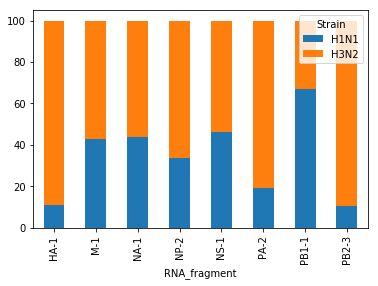

In [326]:
import pandas as pd
import seaborn as sns
import sys

#df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/Test/30/Test_avec_GSP/all_mapping_stats.tsv", index_col=[0, 1], sep="\t")
df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/Test/30/Test_avec_GSP/all_mapping_stats.tsv", sep="\t")
display(df.head())

""" Stacked barpot not normalized
display(df.head(2))
df2 = df.loc[["H1N1", "H3N2"]]
display(df2)
perc = df2.apply(lambda x: x/x.sum()*100, axis=0)
display(perc)
perc.plot(kind="bar", stacked=True)
"""
# Keeping only the lines with a real strain (not Undefined or MappingAmbiguous)
df = df.loc[(df["Strain"] != "Undefined") & (df["Strain"] != "MappingAmbiguous") & (df["RNA_fragment"] != "Undefined") & (df["RNA_fragment"] != "MappingAmbiguous")]
# Setting the multi-index (Strain and RNA_fragment)
df.set_index(["Strain", "RNA_fragment"], inplace=True)
# Selecting only the i02 sample data
df = df["i02"]
# Computing the percentage
df = df.groupby("RNA_fragment").apply(lambda x: 100 * x / float(x.sum()))
# Resetting the index and pivotting to get the strains as columns
df = df.reset_index()
df = df.pivot(index="RNA_fragment", columns="Strain", values="i02")
# Creating the plot
df.plot.bar(stacked=True)
"""
ct = pd.crosstab(state_pcts.RNA_fragment, state_pcts.Strain)
print(ct.head(2))
#ct.plot.bar(stacked=True)
state_pcts.plot.bar(stacked=True)
#state_pcts.plot.bar(stacked=True)
#sns.barplot(state_pcts, )
"""
"""
df = df.loc[(df["Strain"] != "Undefined") & (df["Strain"] != "MappingAmbiguous") & (df["RNA_fragment"] != "Undefined") & (df["RNA_fragment"] != "MappingAmbiguous")]
perc = df.iloc[:,2:].apply(lambda x: x/x.sum()*100, axis=0)
display(perc)
perc["i02"].plot(kind="bar")
"""
"""
df = df.loc[(df["Strain"] != "Undefined") & (df["Strain"] != "MappingAmbiguous") & (df["RNA_fragment"] != "Undefined") & (df["RNA_fragment"] != "MappingAmbiguous")]
display(df.tail(2))

df = pd.melt(df, id_vars=["Strain", "RNA_fragment"], value_vars=["i02", "i03", "i04", "i05", "i06", "i07", "i08"], var_name="Sample")
df["Amplicon"] = df["Strain"] + "_" + df["RNA_fragment"]
display(df.head(2))

ax = sns.barplot(data=df, x="Amplicon", y="value", hue="Sample", ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
"""

In [17]:
import pandas as pd

df = pd.read_csv("/projects/biocompan/Bioinformatics_services/201810_Pasteur_Isel-Griffith_DemultiplexInfluenza_A2018/Runs/181123_C6CK5/i05/i05.all_filter.tsv", sep="\t")

display(df.head())

df2 = df.groupby("Barcode").UMI.count()
df2 = df.groupby("Barcode").filter(lambda x: x["UMI"].nunique() > 1500)
display(df2.head())
display(df2.groupby("Strain").count())

,Unnamed: 0,UMI,Strain,RNA_fragment,Barcode
0,M01626:405:000000000-C6CK5:1:1102:6137:20126,AATGTAAGT,H3N2,NS-1,A1-B13-C67-D4
1,M01626:405:000000000-C6CK5:1:2112:14954:11234,ACCGGTGTA,H1N1,NA-1,A1-B13-C67-D4
2,M01626:405:000000000-C6CK5:1:1110:14684:22965,ACGCGGCGA,H3N2,PB1-1,A1-B13-C67-D4
3,M01626:405:000000000-C6CK5:1:2111:8149:3508,AGCCCTGGA,H3N2,NS-1,A1-B13-C67-D4
4,M01626:405:000000000-C6CK5:1:2111:20884:22957,AGTCGTGCA,H3N2,NS-1,A1-B13-C67-D4


,Unnamed: 0,UMI,Strain,RNA_fragment,Barcode
5447,M01626:405:000000000-C6CK5:1:1108:25405:13873,AAAACGCTG,H3N2,NS-1,A1-B88-C91-D4
5448,M01626:405:000000000-C6CK5:1:1107:7012:12185,AAAAGGTCT,H3N2,NS-1,A1-B88-C91-D4
5449,M01626:405:000000000-C6CK5:1:1119:16189:12356,AAAAGTCTA,H3N2,NS-1,A1-B88-C91-D4
5450,M01626:405:000000000-C6CK5:1:2102:16110:7947,AAAAGTGTA,H3N2,PA-2,A1-B88-C91-D4
5451,M01626:405:000000000-C6CK5:1:2118:26864:10810,AAAATCGGG,H3N2,NS-1,A1-B88-C91-D4


,Unnamed: 0,UMI,RNA_fragment,Barcode
Strain,,,,
H1N1,11231,11231,11231,11231
H3N2,70772,70770,70772,70772
MappingAmbiguous,3,3,3,3
Undefined,115,115,115,115
